# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lat_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

555

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solsvik
City not found. Skipping...
Processing Record 2 of Set 1 | makhachkala
Processing Record 3 of Set 1 | jiblah
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | los llanos de aridane
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | kichmengskiy gorodok
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | luau
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | krutinka
Processing Record 20 of Set 1 | bosaso
Processing Record 21 of Set 

Processing Record 34 of Set 4 | nantucket
Processing Record 35 of Set 4 | dingle
Processing Record 36 of Set 4 | egvekinot
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | puerto escondido
Processing Record 39 of Set 4 | montepuez
Processing Record 40 of Set 4 | jizan
Processing Record 41 of Set 4 | luleburgaz
Processing Record 42 of Set 4 | leshukonskoye
Processing Record 43 of Set 4 | bexhill
Processing Record 44 of Set 4 | soyo
Processing Record 45 of Set 4 | charlestown
Processing Record 46 of Set 4 | iracoubo
Processing Record 47 of Set 4 | birjand
Processing Record 48 of Set 4 | sinkat
City not found. Skipping...
Processing Record 49 of Set 4 | andenes
Processing Record 0 of Set 5 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | robinson
Processing Record 2 of Set 5 | boende
Processing Record 3 of Set 5 | buraydah
Processing Record 4 of Set 5 | zelenogorskiy
Processing Record 5 of Set 5 | agadez
Processing Record 6 of Set 5 | coah

Processing Record 22 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 23 of Set 8 | pacasmayo
Processing Record 24 of Set 8 | neepawa
Processing Record 25 of Set 8 | malkangiri
Processing Record 26 of Set 8 | kamenka
Processing Record 27 of Set 8 | wamba
Processing Record 28 of Set 8 | maxixe
Processing Record 29 of Set 8 | skjervoy
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | anupgarh
Processing Record 32 of Set 8 | mrirt
City not found. Skipping...
Processing Record 33 of Set 8 | cortez
Processing Record 34 of Set 8 | monrovia
Processing Record 35 of Set 8 | hauterive
Processing Record 36 of Set 8 | abha
Processing Record 37 of Set 8 | yumbe
Processing Record 38 of Set 8 | garowe
Processing Record 39 of Set 8 | jeremie
Processing Record 40 of Set 8 | filingue
Processing Record 41 of Set 8 | katete
Processing Record 42 of Set 8 | iskateley
Processing Record 43 of Set 8 | bababe
City not found. Skipping...
Processing Record 44 of Set 8 | 

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          507
Lat           507
Lng           507
Max Temp      507
Humidity      507
Cloudiness    507
Wind Speed    507
Country       507
Date          507
dtype: int64

In [6]:
# Display the City DataFrame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makhachkala,42.98,47.50,41.00,93,90,4.47,RU,1609365944
1,jiblah,13.92,44.15,57.69,85,23,4.65,YE,1609366061
2,rikitea,-23.12,-134.97,78.30,76,0,11.92,PF,1609366061
3,qaanaaq,77.48,-69.36,8.08,73,67,13.29,GL,1609366061
4,hermanus,-34.42,19.23,64.00,80,4,10.71,ZA,1609366061


## Latitude vs Temperature Plot

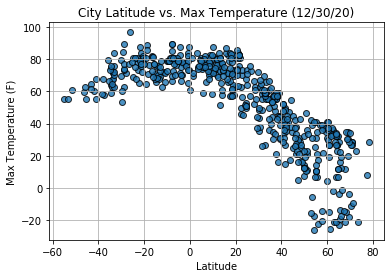

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/City_Latitude_vs_Max_Temperature.png")

plt.show()


## Latitude vs. Humidity Plot

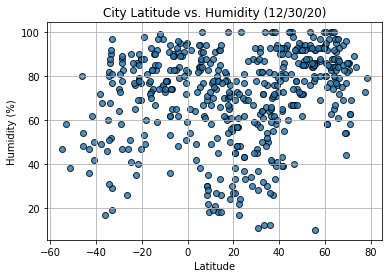

In [8]:
plt.scatter(lats,
           humidity,
           edgecolor = "Black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

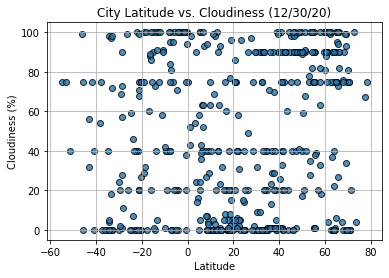

In [9]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths = 1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

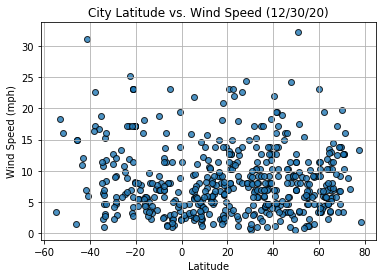

In [10]:
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/City_Latitude_vs_Wind_Speed")

plt.show()

## Linear Regression

In [11]:
# Function for create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [12]:
#Nothern a Southern DataFrames
nothern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

## Max Temp vs Latitude Linear Regression

The r-squared is: -0.8471975735532362


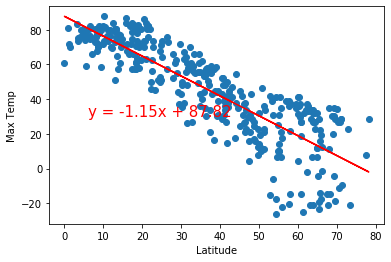

In [13]:
# linear regression on Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values = nothern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

The r-squared is: 0.5004567010687696


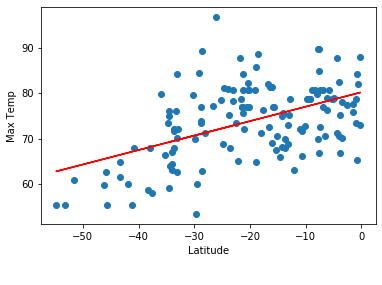

In [14]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

## Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35143562353869395


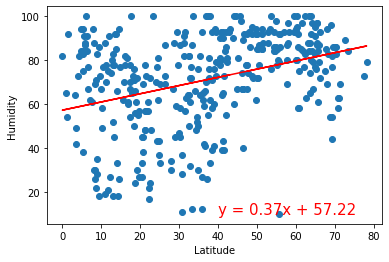

In [15]:
# Nothern Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values = nothern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

The r-squared is: 0.415974773793121


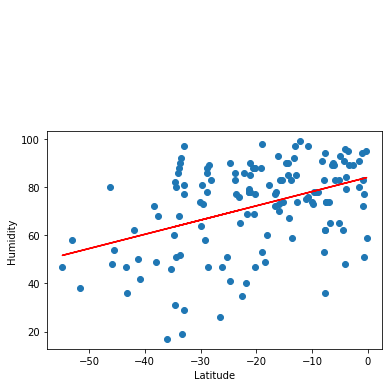

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

The low r values indicate a weak to no relationship between humidity and latitude

## Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3311520612369361


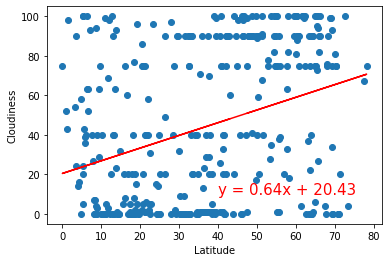

In [19]:
# Nother Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values = nothern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.26887275839623526


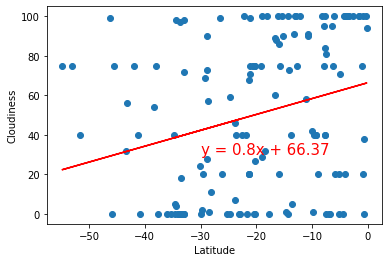

In [20]:
# Southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness

## Wind Speed (mph) vs. Latitude Linear Regressions

The r-squared is: 0.06884685141777494


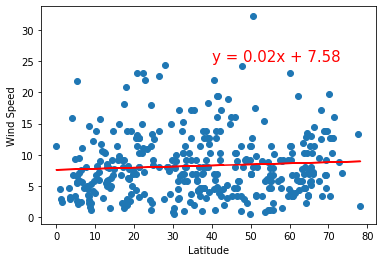

In [21]:
# Nother Hemisphere
x_values = nothern_hemi_df["Lat"]
y_values = nothern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: -0.26774158448422464


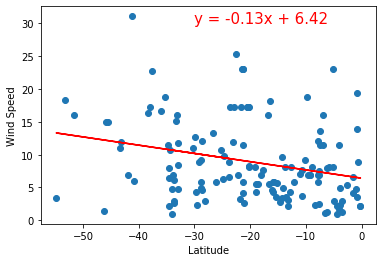

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon